<a href="https://colab.research.google.com/github/brunopazitto/Projetos-Machine-Learning/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este estudo visa a identificação de sobrevimentes e pessoas que morreram durante o naufragio do TITANIC**


Importação das bibliotecas que serão utilizadas no decorrer do estudo 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
#Bibliotecas Modelos Machine Learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Identificação dos Atributos que compõem a base de dados

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
#Realizando a importação da base de dados para a plataforma
dt_titanic = pd.read_csv('/content/titanic.csv')

In [3]:
dt_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dt_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dt_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dt_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exclusão das variáveis que não serão utilizadas.

In [8]:
dt_titanic.drop(columns='Fare', inplace=True)
dt_titanic.drop(columns='Cabin', inplace=True)
dt_titanic.drop(columns='Ticket', inplace=True)
dt_titanic.drop(columns='Embarked', inplace=True)
dt_titanic.drop(columns='Name', inplace=True)

In [9]:
dt_titanic['Age'] = dt_titanic['Age'].values.astype(np.int16)

In [10]:
dt_titanic.loc[dt_titanic['Age']==0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
5,6,0,3,male,0,0,0
17,18,1,2,male,0,0,0
19,20,1,3,female,0,0,0
26,27,0,3,male,0,0,0
28,29,1,3,female,0,0,0
...,...,...,...,...,...,...,...
859,860,0,3,male,0,0,0
863,864,0,3,female,0,8,2
868,869,0,3,male,0,0,0
878,879,0,3,male,0,0,0


Removendo as idades com valor 0 devido a conversão de float para int.

In [12]:
dt_titanic.drop(dt_titanic.loc[dt_titanic['Age']==0].index, inplace=True)

Esta tabela nos apresenta a quantidade de pessoas por genero e classe que sobreviveram ou morreram no naufrágio do navio TITANIC.

In [13]:
pd.crosstab([dt_titanic['Survived'], dt_titanic['Sex']],dt_titanic['Pclass'])

Pclass            1   2    3
Survived Sex                
0        female   3   6   55
         male    61  84  215
1        female  82  68   45
         male    39  12   37

Neste gráfico podemos análisar como os dados estão distribuídos em nossa classe preditora.
Notamos que a classe majoritária é a classe de pessoas que morreram, com isso no decorrer deste estudo, será necessário que estes dados sejam balanceados para que não ocorrá overfitting "Enviesamento" nos modelos utilizados.

Text(0.5, 1.0, 'Quantidade de Sobreviventes X Mortes')

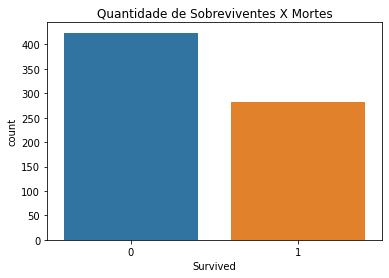

In [14]:
sb.countplot(x = dt_titanic['Survived'])
plt.title('Quantidade de Sobreviventes X Mortes')

Text(0.5, 1.0, 'Histograma de idades a bordo')

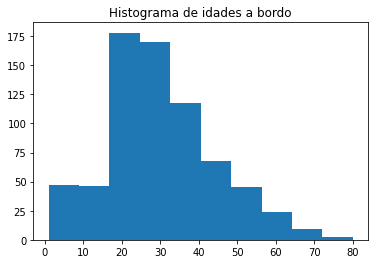

In [15]:
#Distribuição de idades a bordo
plt.hist(x = dt_titanic['Age'])
plt.title('Histograma de idades a bordo')

Text(0.5, 1.0, 'Quantidade de Pessoas por Gênero')

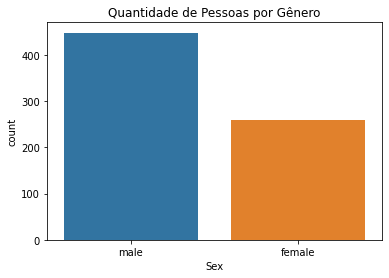

In [16]:
#Quantidade de Pessoas por Gênero
sb.countplot(x = dt_titanic['Sex'])
plt.title('Quantidade de Pessoas por Gênero')

In [17]:
#Analisando os gráficos de dispersão para verificarmos como os dados estão distribuídos entre os atributos.
grafico = px.scatter_matrix(dt_titanic, dimensions=['Age','Sex','Pclass'])
grafico.show()

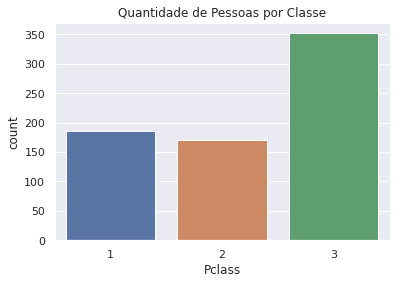

In [18]:
#Quantidade de pessoas por classe no Navio
sb.set_theme(style="darkgrid")
plt.title('Quantidade de Pessoas por Classe')
ax = sb.countplot(x="Pclass", data=dt_titanic)

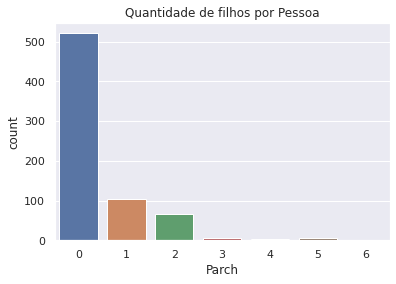

In [19]:
sb.set_theme(style="darkgrid")
plt.title('Quantidade de filhos por Pessoa')
ax = sb.countplot(x="Parch", data=dt_titanic)

In [20]:
#Quantidade de Filhos por pessoa
filho = dt_titanic.groupby(dt_titanic['Parch'])['Parch'].count()
filho

Parch
0    521
1    105
2     66
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

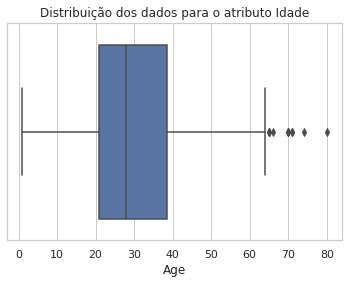

In [21]:
#Gráfico apresenta a distribuição dos dados para o atributo classe, notamos a presença de alguns outliers.
sb.set(style='whitegrid')
plt.title('Distribuição dos dados para o atributo Idade')
bx = sb.boxplot(x=dt_titanic['Age'])

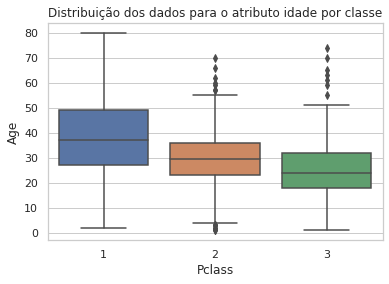

In [22]:
plt.title('Distribuição dos dados para o atributo idade por classe')
ax = sb.boxplot(x="Pclass", y="Age", data=dt_titanic)

In [105]:
teste = dt_titanic.groupby(['Sex'])['Survived'].sum().reset_index()
sex = teste['Survived'].sort_index()
sex

0    195
1     88
Name: Survived, dtype: int64

<function matplotlib.pyplot.show>

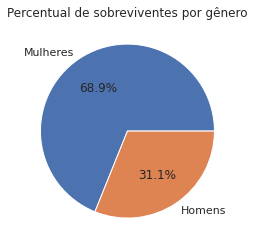

In [122]:
rotulo = ['Mulheres', 'Homens']
plt.pie(sex, labels= rotulo,autopct='%1.1f%%',)
plt.title('Percentual de sobreviventes por gênero')
plt.show

<function matplotlib.pyplot.show>

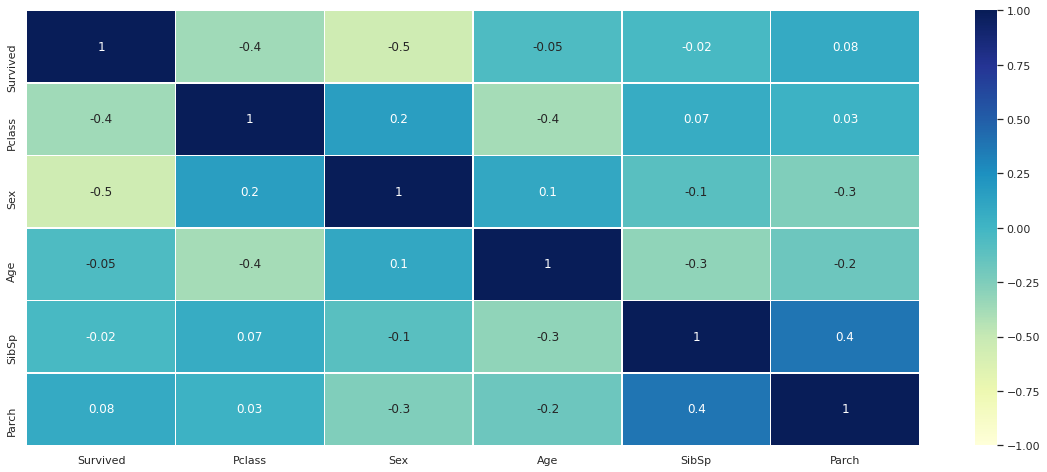

In [ ]:
#Matriz de correlação para que possamos verificar o quando cada atributo tem influencia sobre outro atributo.
cor = dt_titanic.iloc[:, 1:7]
correlacao = cor.corr()
plt.figure(figsize=(20,8))
sb.heatmap(correlacao, linewidths=0.5, vmin=-1, vmax=1, annot=True, cmap='YlGnBu', fmt='.1g')
plt.show

In [54]:
dt_titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Aplicando técnica get_dummies para dividir a variável Pclass para valores binários.

In [55]:
dt_titanic = pd.get_dummies(dt_titanic, columns = ['Pclass'])

Utilizando o Label Encoder sobre o atributo SEX, para transformar o atributo categórico em numérico

In [56]:
label_encoder = LabelEncoder()

In [57]:
sex = label_encoder.fit_transform(dt_titanic['Sex'])
sex

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [58]:
label_encoder_Sex = LabelEncoder()

In [59]:
dt_titanic['Sex'] = label_encoder_Sex.fit_transform(dt_titanic['Sex'])

In [61]:
dt_titanic.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,22,1,0,0,0,1
1,2,1,0,38,1,0,1,0,0
2,3,1,0,26,0,0,0,0,1
3,4,1,0,35,1,0,1,0,0
4,5,0,1,35,0,0,0,0,1


Realizando a divisão entre previsores e classe (Target)

In [62]:
type(dt_titanic)

pandas.core.frame.DataFrame

In [63]:
x = dt_titanic.iloc[:, 2:9]

In [64]:
x.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,22,1,0,0,0,1
1,0,38,1,0,1,0,0
2,0,26,0,0,0,0,1
3,0,35,1,0,1,0,0
4,1,35,0,0,0,0,1


In [65]:
y = dt_titanic.iloc[:,1]

In [66]:
y.count()

707

Tratanto o desbalanceamento da classe com o método de undersampling utilizando o SMOTE

In [67]:
#Visualizando a quantidade de registros por classe
np.bincount(y)

array([424, 283])

In [68]:
smt = SMOTE()
x, y = smt.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [69]:
#Quantidade de registros após a aplicação do método de undersampling utiliznado o SMOTE
np.bincount(y)

array([424, 424])

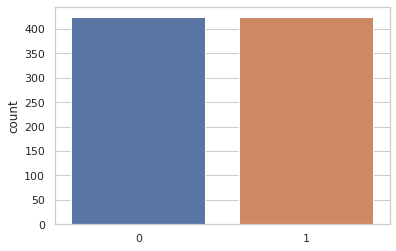

In [70]:
#Neste gráfico é apresentado a quantidade de registros da classe preditora balanceada.
sm = sb.countplot(x=y)

Realizando a divisão entre as classes de treinamento e teste

In [71]:
X_train, x_teste, Y_train, y_teste = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [75]:
X_train.shape, Y_train.shape , x_teste.shape , y_teste.shape

((508, 7), (508,), (340, 7), (340,))

Para fins de estudo e testes, foram utilizados os seguintes Modelos de Machinne Learning.
- Suporte Vector Machine SVM
- RandomForestClassifier 
- KNeighborsClassifier KNN
- GaussianNB Naive Bayes

Todos os modelos foram aplicados e avaliado o desempenho individualmente

In [77]:
#Apresentação dos dados ao modelo Suporte Vector Machine e treinando o modelo
mod_svm = SVC(gamma='auto', kernel='rbf', random_state=1)
mod_svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [78]:
#Classificando os dados
predict = mod_svm.predict(x_teste)
predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [109]:
#Verificando o valor real com o valor previsto pelo modelo
predict = pd.DataFrame({'Valor_Real': y_teste, 'Valor_Previsto_SVM': predict})
predict.head(10)

,Valor_Real,Valor_Previsto_SVM
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [91]:
#Métricas de Avaliação/desempenho do modelo
print('Acurácia_SVM\n', metrics.accuracy_score(y_teste, predict))
print('Precision\n', metrics.precision_score(y_teste, predict))
print('Recall\n', metrics.recall_score(y_teste, predict))
print('AUROC\n', metrics.roc_auc_score(y_teste, predict))
print('\nClassification Report\n', metrics.classification_report(y_teste, predict))
print('Score sobre o Teste\n', mod_svm.score(x_teste, y_teste))
print('Score sobre o Treinamento\n', mod_svm.score(X_train, Y_train))

Acurácia_SVM
 0.788235294117647
Precision
 0.8050314465408805
Recall
 0.757396449704142
AUROC
 0.7880549499982697

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       171
           1       0.81      0.76      0.78       169

    accuracy                           0.79       340
   macro avg       0.79      0.79      0.79       340
weighted avg       0.79      0.79      0.79       340

Score sobre o Teste
 0.788235294117647
Score sobre o Treinamento
 0.8641732283464567


Text(0.5, 1.0, 'Matriz de confusão Modelo_SVM')

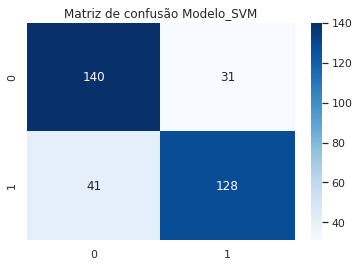

In [95]:
#Matriz de Confução
cm_svm = confusion_matrix(y_teste, predict)
sb.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão Modelo_SVM')

Text(0.5, 1.0, 'Curva ROC Modelo_SVM')

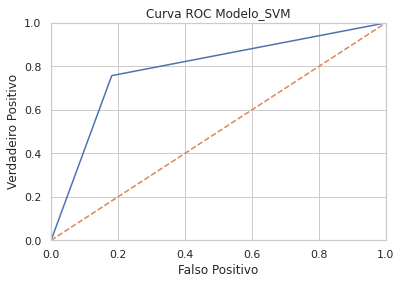

In [103]:
#Curva ROC 
false_positive, True_positive, thresholds = roc_curve(y_teste, predict)
plt.plot(false_positive, True_positive)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC Modelo_SVM')

In [188]:
#Apresentação dos dados ao modelo RandomForestClassifier e Realizando o Treinamento.
mod_randf = RandomForestClassifier(n_estimators=150,criterion='entropy', random_state=42)
mod_randf.fit(X_train,Y_train);

In [189]:
#Classificando os dados
predict_randf = mod_randf.predict(x_teste)

In [190]:
#Comparando o valor real com o Valor Previsto
pred_randf = pd.DataFrame({'Valor_Real': y_teste, 'Valor_Previsto_RFC': predict_randf})
pred_randf.head(10)

,Valor_Real,Valor_Previsto_RFC
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [194]:
#Análisando as métricas de avaliação do desempenho do modelo
print('Acurácia\n', metrics.accuracy_score(y_teste, predict_randf))
print('Precision\n', metrics.precision_score(y_teste, predict_randf))
print('Recall\n', metrics.recall_score(y_teste, predict_randf))
print('AUROC\n', metrics.roc_auc_score(y_teste, predict_randf))
print('\nClassification Reports\n', metrics.classification_report(y_teste, predict_randf))
print('Score sobre o Teste\n', mod_randf.score(x_teste, y_teste))
print('Score sobre o Treinamento\n', mod_randf.score(X_train, Y_train))

Acurácia
 0.8294117647058824
Precision
 0.8284023668639053
Recall
 0.8284023668639053
AUROC
 0.8294058617945258

Classification Reports
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       171
           1       0.83      0.83      0.83       169

    accuracy                           0.83       340
   macro avg       0.83      0.83      0.83       340
weighted avg       0.83      0.83      0.83       340

Score sobre o Teste
 0.8294117647058824
Score sobre o Treinamento
 0.9448818897637795


Text(0.5, 1.0, 'Matriz de confusão Modelo_RFC')

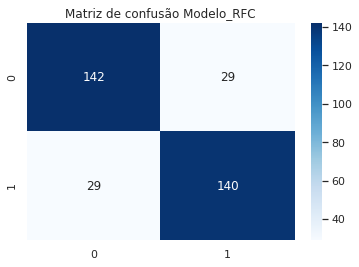

In [195]:
#Matriz de Confusão
cm_rfc = confusion_matrix(y_teste, predict_randf)
sb.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão Modelo_RFC')

Text(0.5, 1.0, 'Curva ROC Modelo_RFC')

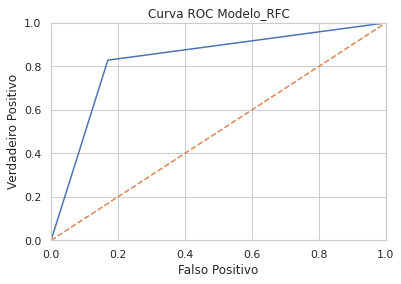

In [276]:
#Curva ROC para medir o poder de generalizão do modelo
false_positive, True_positive, thresholds = roc_curve(y_teste, predict_randf)
plt.plot(false_positive, True_positive)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC Modelo_RFC')

In [269]:
#Apresentando os dados ao modelo KNN e realizado o treinamento
mod_knn = KNeighborsClassifier(n_neighbors=5, leaf_size=100, p=1)
mod_knn.fit(X_train, Y_train);

In [270]:
#Classificando os registros
predict_knn = mod_knn.predict(x_teste)

In [281]:
#Comparando os valores reais com os valores previsto
pred_knn = pd.DataFrame({'Valor_Real': y_teste, 'Valor_Previsto_KNN': predict_knn})
pred_knn.head(10)

,Valor_Real,Valor_Previsto_KNN
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [272]:
#Analisando as métricas de avaliação/desempenho do modelo
print('Acurácia\n', metrics.accuracy_score(y_teste, predict_knn))
print('Precision\n', metrics.precision_score(y_teste, predict_knn))
print('Recall\n', metrics.recall_score(y_teste, predict_knn))
print('AUROC\n', metrics.roc_auc_score(y_teste, predict_knn))
print('\nClassification Reports\n', metrics.classification_report(y_teste, predict_knn))
print('Score sobre o Teste\n', mod_knn.score(x_teste, y_teste))
print('Score sobre o Treinamento\n', mod_knn.score(X_train, Y_train))

Acurácia
 0.7911764705882353
Precision
 0.7722222222222223
Recall
 0.8224852071005917
AUROC
 0.7913595626146235

Classification Reports
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       171
           1       0.77      0.82      0.80       169

    accuracy                           0.79       340
   macro avg       0.79      0.79      0.79       340
weighted avg       0.79      0.79      0.79       340

Score sobre o Teste
 0.7911764705882353
Score sobre o Treinamento
 0.8661417322834646


Text(0.5, 1.0, 'Matriz de confusão Modelo_RFC')

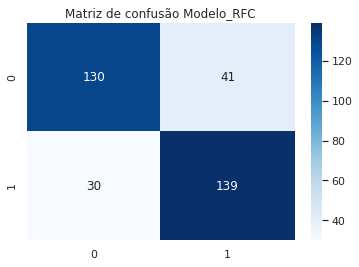

In [273]:
#Matriz de confusão
cm_knn = confusion_matrix(y_teste, predict_knn)
sb.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão Modelo_RFC')

Text(0.5, 1.0, 'Curva ROC Modelo_KNN')

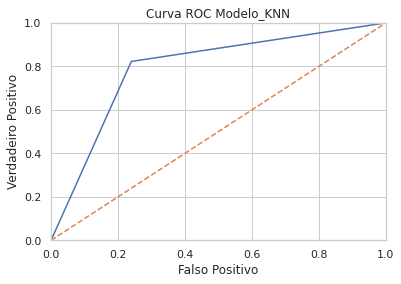

In [275]:
#Curva ROC
false_positive, True_positive, thresholds = roc_curve(y_teste, predict_knn)
plt.plot(false_positive, True_positive)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC Modelo_KNN')

In [277]:
#Apresentando os dados ao modelo Naive Bayes e realizando o treinamento
mod_NB = GaussianNB()
mod_NB.fit(X_train, Y_train);

In [278]:
#Classificando os dados
predict_NB = mod_NB.predict(x_teste)

In [280]:
#Comparando os valores Reais com os previstos pelo modelo
pred_NB = pd.DataFrame({'Valor_Real': y_teste, 'Valor_Previsto_NB': predict_NB})
pred_NB.head(10)

,Valor_Real,Valor_Previsto_NB
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [286]:
#Analisando as métricas de avaliação/desempenho do modelo
print('Acurácia\n', metrics.accuracy_score(y_teste, predict_NB))
print('Precision\n', metrics.precision_score(y_teste, predict_NB))
print('Recall\n', metrics.recall_score(y_teste, predict_NB))
print('AUROC\n', metrics.roc_auc_score(y_teste, predict_NB))
print('\nClassification Reports\n', metrics.classification_report(y_teste, predict_NB))

Acurácia
 0.7558823529411764
Precision
 0.7311827956989247
Recall
 0.8047337278106509
AUROC
 0.7561680334959687

Classification Reports
               precision    recall  f1-score   support

           0       0.79      0.71      0.74       171
           1       0.73      0.80      0.77       169

    accuracy                           0.76       340
   macro avg       0.76      0.76      0.76       340
weighted avg       0.76      0.76      0.76       340



Text(0.5, 1.0, 'Matriz de confusão Modelo_RFC')

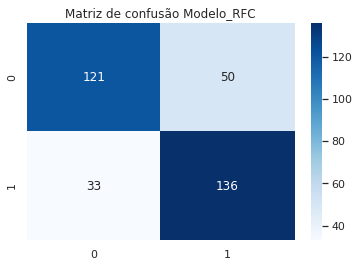

In [287]:
#Matriz de Confusão
mod_NB = confusion_matrix(y_teste, predict_NB)
sb.heatmap(mod_NB, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão Modelo_RFC')

Text(0.5, 1.0, 'Curva ROC Modelo_NB')

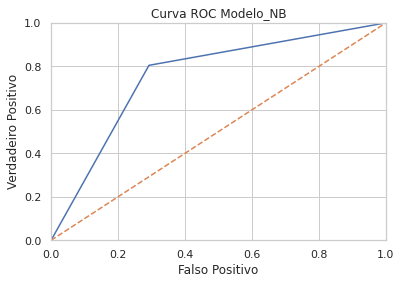

In [288]:
#Curva ROC
false_positive, True_positive, thresholds = roc_curve(y_teste, predict_NB)
plt.plot(false_positive, True_positive)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC Modelo_NB')

In [293]:
mod_randf.feature_importances_

array([0.29072959, 0.4108169 , 0.0784445 , 0.05029607, 0.04510627,
       0.03525688, 0.08934977])

Podemos observar neste gráfico que o sexo da pessoa, idade, esposos e esposas e a classe possuem uma grande influência sobre o modelo.

Text(0.5, 1.0, 'Importância de cada feature')

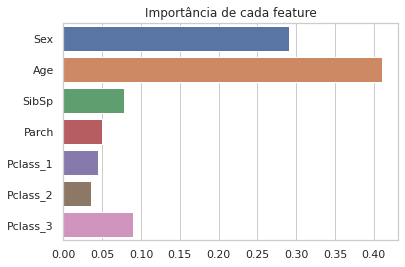

In [307]:
#Verificando a importância de cada Feature no modelo
importances = pd.Series(data=mod_randf.feature_importances_,index=dt_titanic.iloc[:, 2:9].columns)
sb.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')